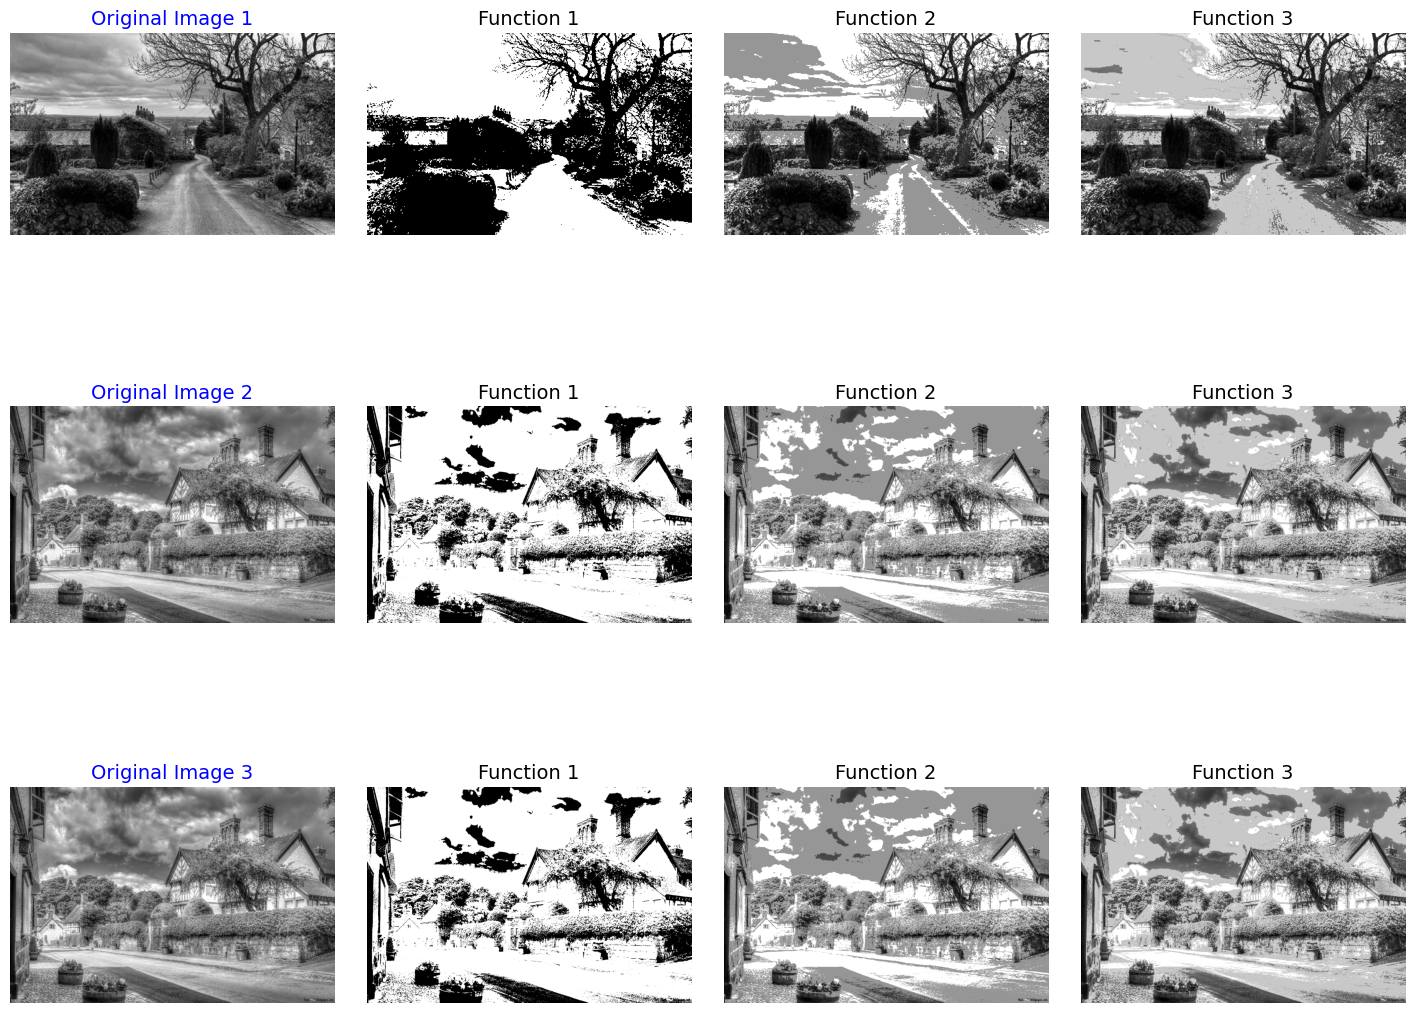

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ---------- Function Definitions ----------
def function1(img):
    """Simple binary threshold: <=100 -> 0, else -> 255"""
    output = np.where(img <= 100, 0, 255)
    return output.astype(np.uint8)

def function2(img):
    """
    Multi-level mapping:
    0–80 => original
    80–160 => 150
    >160 => 255
    """
    output = np.copy(img)
    output[(img >= 80) & (img <= 160)] = 150
    output[img > 160] = 255
    return output.astype(np.uint8)

def function3(img):
    """
    0–120 => original
    120–180 => 200
    190–200 => 220
    >200 => 255
    """
    output = np.copy(img)
    output[(img >= 120) & (img <= 180)] = 200
    output[(img >= 190) & (img <= 200)] = 220
    output[img > 200] = 255
    return output.astype(np.uint8)

# ---------- Load Images ----------
img1 = cv2.imread("v1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("v2.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("v3.png", cv2.IMREAD_GRAYSCALE)

# ---------- Process Images ----------
images = [img1, img2, img3]
funcs = [function1, function2, function3]
func_names = ["Function 1", "Function 2", "Function 3"]

# ---------- Plot ----------
plt.figure(figsize=(18, 14))

for i, img in enumerate(images):  # Each image (row)
    # Original Image
    plt.subplot(len(images), 4, i*4 + 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(f"Original Image {i+1}", fontsize=14, color='blue')
    plt.axis('off')

    # Processed Images
    for j, func in enumerate(funcs):
        processed_img = func(img)
        plt.subplot(len(images), 4, i*4 + 2 + j)
        plt.imshow(processed_img, cmap='gray', vmin=0, vmax=255)
        plt.title(func_names[j], fontsize=14)
        plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.1)
plt.show()
